In [1]:
import numpy as np
from matplotlib import pyplot as plt

### [1] Data preparation

In [2]:
def make_blobs(distance=1, sigma=0.1, nA=2000, nB=2000):
    
    # define two centers for the two classes: class-A and class-B
    center_A = np.random.uniform(-10, 10, 2)
    theta = np.pi / 3
    displacement = np.array([distance*np.cos(theta), distance*np.sin(theta)])
    center_B = center_A + displacement
    
    # define a covariance matrix that the two classes share
    cov = sigma*np.array([[1, 0], [0, 1]])
    
    # sample data points from a multivariate normal distribution
    X_A = np.random.multivariate_normal(center_A, cov, nA)
    X_B = np.random.multivariate_normal(center_B, cov, nB)
    Y_A = np.zeros(nA, dtype=np.int) # 0 for class A
    Y_B = np.ones(nB, dtype=np.int) # 1 for class B
    X = np.append(X_A, X_B, axis=0)
    Y = np.append(Y_A, Y_B)
    
    return X, Y

In [3]:
nA = 1000
nB = 1000
X_sample, Y_sample = make_blobs(distance=1, sigma=0.05, nA=nA, nB=nB)

In [4]:
def scatter_plot(X, Y, title, alpha=0.2):
    color_class = ('b', 'r')
    f, ax = plt.subplots(1, figsize=(5, 5))
    index_A = np.where(Y==0)
    index_B = np.where(Y==1)
    plt.plot(X[index_A, 0], X[index_A, 1], '.', color=color_class[0], alpha=alpha)
    plt.plot(X[index_B, 0], X[index_B, 1], '.', color=color_class[1], alpha=alpha)
    plt.plot(np.mean(X[index_A, 0]), np.mean(X[index_A, 1]), '.', color=color_class[0], label='class A')
    plt.plot(np.mean(X[index_B, 0]), np.mean(X[index_B, 1]), '.', color=color_class[1], label='class B')
    plt.legend()
    plt.title(title + ' (N=%d)' %len(Y))
    plt.axis('equal')  
    return f, ax

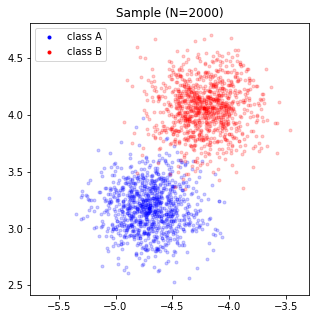

In [5]:
f, ax = scatter_plot(X_sample, Y_sample, 'Sample')
plt.show()

In [6]:
def train_test_split(X_sample, Y_sample, percent_test=30):
    n_sample = X_sample.shape[0]
    n_test = round(n_sample*percent_test/100)
    n_train = n_sample - n_test
    
    # random shuffle
    index = np.random.permutation(n_sample)
    X_sample = X_sample[index]
    Y_sample = Y_sample[index]

    index_test = np.random.choice(n_sample, n_test, replace=False)
    X_test = X_sample[index_test]
    Y_test = Y_sample[index_test]
    
    X_train = np.delete(X_sample, index_test, axis=0)
    Y_train = np.delete(Y_sample, index_test)
    
    return X_train, X_test, Y_train, Y_test

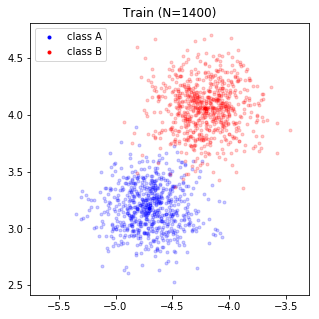

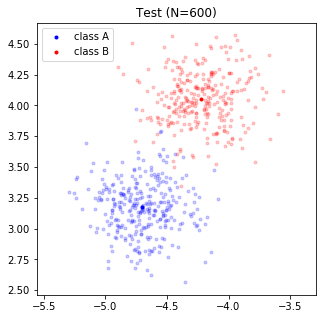

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample)
n_train = len(Y_train)
n_test = len(Y_test)

f, ax = scatter_plot(X_train, Y_train, 'Train')
plt.show()
f, ax = scatter_plot(X_test, Y_test, 'Test')
plt.show()

### [2] Build a neural network

In [8]:
def initialize(dim):
    W = np.random.randn(dim)
    return W

In [9]:
W = initialize(3)

In [10]:
def bias_extend(X):
    bias = np.ones((X.shape[0], 1))
    X_ext = np.append(bias, X, axis=1)
    return X_ext

In [11]:
X_train_ext = bias_extend(X_train)
X_test_ext = bias_extend(X_test)

In [12]:
def activate(X_ext, W):
    weighted_sum = np.matmul(X_ext, W)
    output = np.where(weighted_sum > 0, 1, 0)
    return output

In [13]:
Y_train_predict = activate(X_train_ext, W)
Y_test_predict = activate(X_test_ext, W)

In [14]:
def cost(Y_predict, Y):
    error = Y_predict - Y
    return 0.5*np.dot(error, error)

In [15]:
cost_train = cost(Y_train_predict, Y_train)
cost_test = cost(Y_test_predict, Y_test)

In [16]:
def accuracy(Y_predict, Y):
    return sum(Y_predict == Y) / len(Y)

In [17]:
acc_train = accuracy(Y_train_predict, Y_train)
acc_test = accuracy(Y_test_predict, Y_test)

In [18]:
def update(W, X_ext, Y, beta=0.001):
    Y_predict = activate(X_ext, W)
    W += beta * np.matmul(X_ext.T, (Y - Y_predict)) # [3, n_data] * [n_data,] = [3,]
    return W

In [19]:
print('Initial weight =', W)
W = update(W, X_train_ext, Y_train)
print('Updated weight =', W)

Initial weight = [ 0.66526832 -1.42987854 -1.37484241]
Updated weight = [-0.02173168  1.80156268 -3.5567032 ]


### [3] Train the neural network and evaluate the result

In [20]:
# training
beta = 0.001
n_epoch = 500
W = initialize(X_train_ext.shape[1])
print('Initial weight =', W)

for epoch in range(n_epoch):
    X_train_ext = bias_extend(X_train)
    W = update(W, X_train_ext, Y_train, beta=beta)
    
print('Final weight =', W)


# evaluation
Y_train_predict = activate(X_train_ext, W)
Y_test_predict = activate(X_test_ext, W)
acc_train = accuracy(Y_train_predict, Y_train)
acc_test = accuracy(Y_test_predict, Y_test)

print('Train accuracy = %.3f' %acc_train)
print('Test accuracy = %.3f' %acc_test)

Initial weight = [-0.68583907 -1.57396489  0.8209985 ]
Final weight = [ -1.61783907   8.77974896  11.29158472]
Train accuracy = 0.983
Test accuracy = 0.982


### [4] Progress in training

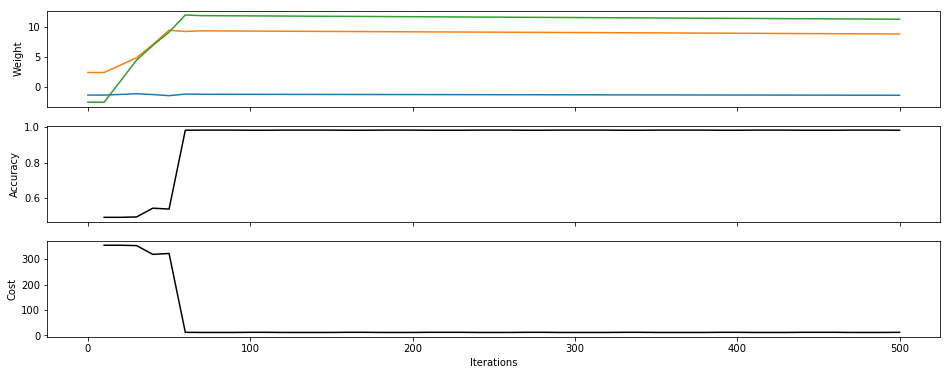

In [21]:
# training
beta = 0.001
n_epoch = 500
W = initialize(X_train_ext.shape[1])
W_hist = [W]
acc_hist = []
cost_hist = []

unit = 10
for epoch in range(n_epoch):
    X_train_ext = bias_extend(X_train)
    W = update(W, X_train_ext, Y_train, beta=beta)
    Y_train_predict = activate(X_train_ext, W)
    
    if epoch % unit == 0:
        W_hist = np.append(W_hist, [W], axis=0)
        acc_train = accuracy(Y_train_predict, Y_train)
        cost_train = cost(Y_train_predict, Y_train)
        acc_hist.append(acc_train)
        cost_hist.append(cost_train)

f, ax = plt.subplots(3, 1, figsize=(16,6), sharex=True)
iters = unit*np.array(range(len(W_hist)))
ax[0].plot(iters, W_hist)
ax[0].set_ylabel('Weight')
ax[1].plot(iters[1:], acc_hist, 'k')
ax[1].set_ylabel('Accuracy')
ax[2].plot(iters[1:], cost_hist, 'k')
ax[2].set_ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

### [5] Visualize the result

In [22]:
center_A = np.mean(X_train[Y_train==0, 1])
center_B = np.mean(X_train[Y_train==1, 1])

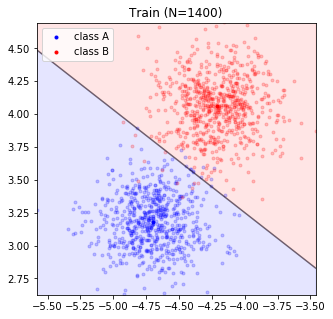

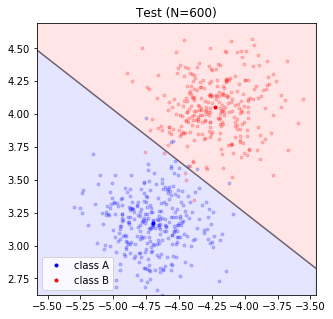

In [23]:
# calculate a separation line slope and intercept
slope = -W[1] / W[2]
intercept = -W[0] / W[2]
x1_min = min(X_train[:, 0])
x1_max = max(X_train[:, 0])
x2_min = min(X_train[:, 1])
x2_max = max(X_train[:, 1])

# which class is at upper area?
center_A = np.mean(X_sample[:,1])

# Train set
f, ax = scatter_plot(X_train, Y_train, 'Train')
X1 = np.linspace(x1_min, x1_max, 100)
X2 = slope*X1 + intercept
plt.plot(X1, X2, 'k', alpha=0.5)
plt.fill_between(X1, X2, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()


# Test set
f, ax = scatter_plot(X_test, Y_test, 'Test')
plt.plot(X1, X2, 'k', alpha=0.5)
plt.fill_between(X1, X2, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()